import sys
sys.path.append('../python')
%run ../python/setenv.py


In [10]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = "3" 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
# import os
# import sys
# import tensorflow as tf

# # Append your custom path
# sys.path.append('../python')

# # Set the LD_LIBRARY_PATH
# os.environ['LD_LIBRARY_PATH'] = ':/global/home/users/njo/anaconda3/envs/gaia/lib/'

# # Import any other modules you need
# from functions import *
# from models import *

# # Verify the availability of the GPUs
# physical_devices = tf.config.list_physical_devices('GPU')
# if len(physical_devices) == 0:
#     print("No GPUs found!")
# else:
#     print(f'{len(physical_devices)} GPUs detected.')
#     # Optional: Enable memory growth for the GPU
#     for device in physical_devices:
#         tf.config.experimental.set_memory_growth(device, True)

# # Optional: Set a specific GPU by index (e.g., 3)
# # os.environ["CUDA_VISIBLE_DEVICES"] = "3"

# # Other initialization code as needed





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


# Part 1: Train on a simulated stream

In [7]:
save_folder = "test_simulated"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

In [8]:
### Load file 
df = pd.read_hdf("../gaia_data/simulated_patch.h5")
make_plots(df, save_folder = save_folder)

In [17]:
print(df_slice.columns.tolist())

['μ_δ', 'μ_α', 'δ', 'α', 'b-r', 'g', 'ϕ', 'λ', 'μ_ϕcosλ', 'μ_λ', 'stream', 'α_wrapped', 'label']


In [12]:
### Divide into signal & sideband regions. Note that these tend to be much narrower than for real streams
# df_slice = signal_sideband(df, save_folder = save_folder, sr_factor=0.25, sb_factor=0.5)
processor = SignalSideband(df,sr_factor=0.25, sb_factor=0.5)
df_slice = processor.process_data()
processor.plot_sb_data(save_folder=save_folder)


<Figure size 1200x800 with 0 Axes>

2023-08-03 21:59:06.629769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-03 21:59:07.345148: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43670 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:c1:00.0, compute capability: 8.6
2023-08-03 21:59:08.861629: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2170/2170 [==============================] - 3s 1ms/step
Plotting results before fiducial cuts...
2170/2170 [==============================] - 3s 1ms/step
Plotting results before fiducial cuts...
2170/2170 [==============================] - 2s 789us/step
Plotting results before fiducial cuts...
2170/2170 [==============================] - 2s 805us/step
Plotting results before fiducial cuts...


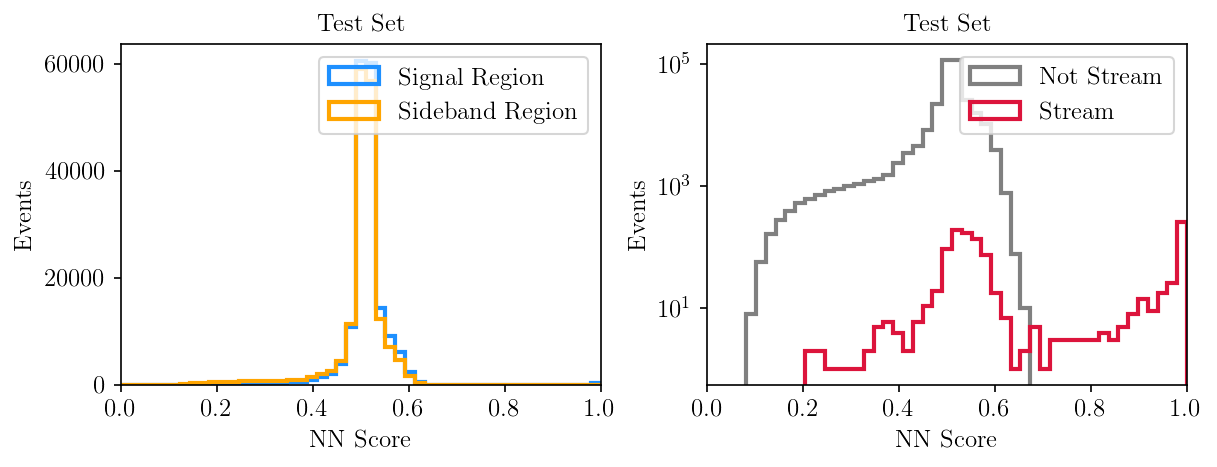

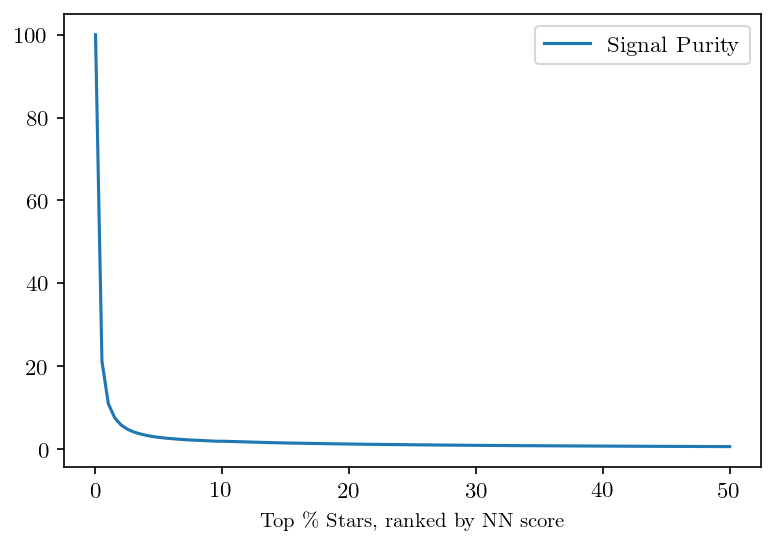

Top 50 stars: Purity = 100.0% 


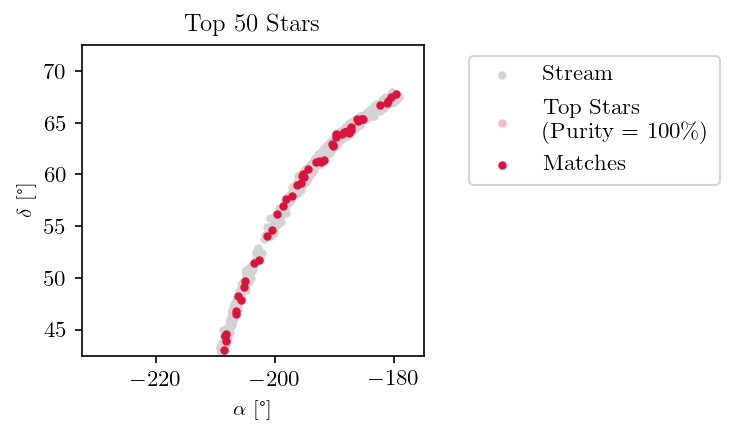

Top 100 stars: Purity = 100.0% 


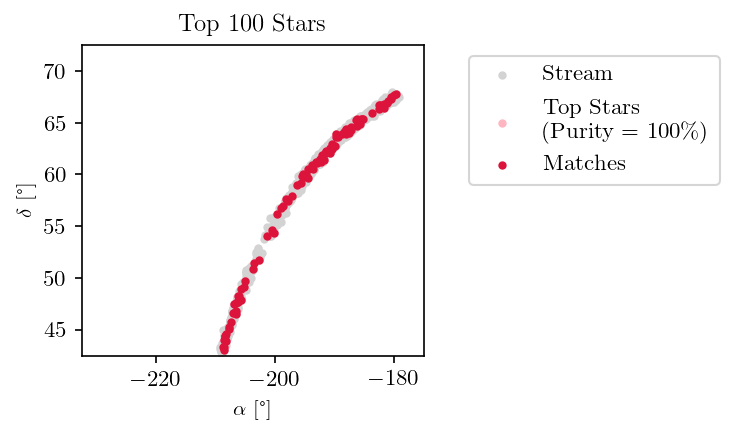

In [6]:
### Train (takes ~15 minutes to run on a GPU)
tf.keras.backend.clear_session()
test = train(df_slice, verbose=False, apply_cuts = False, save_folder = save_folder)

# Part 2: Train on a real patch of the GD-1 stream

In [18]:
save_folder = "test_gd1"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

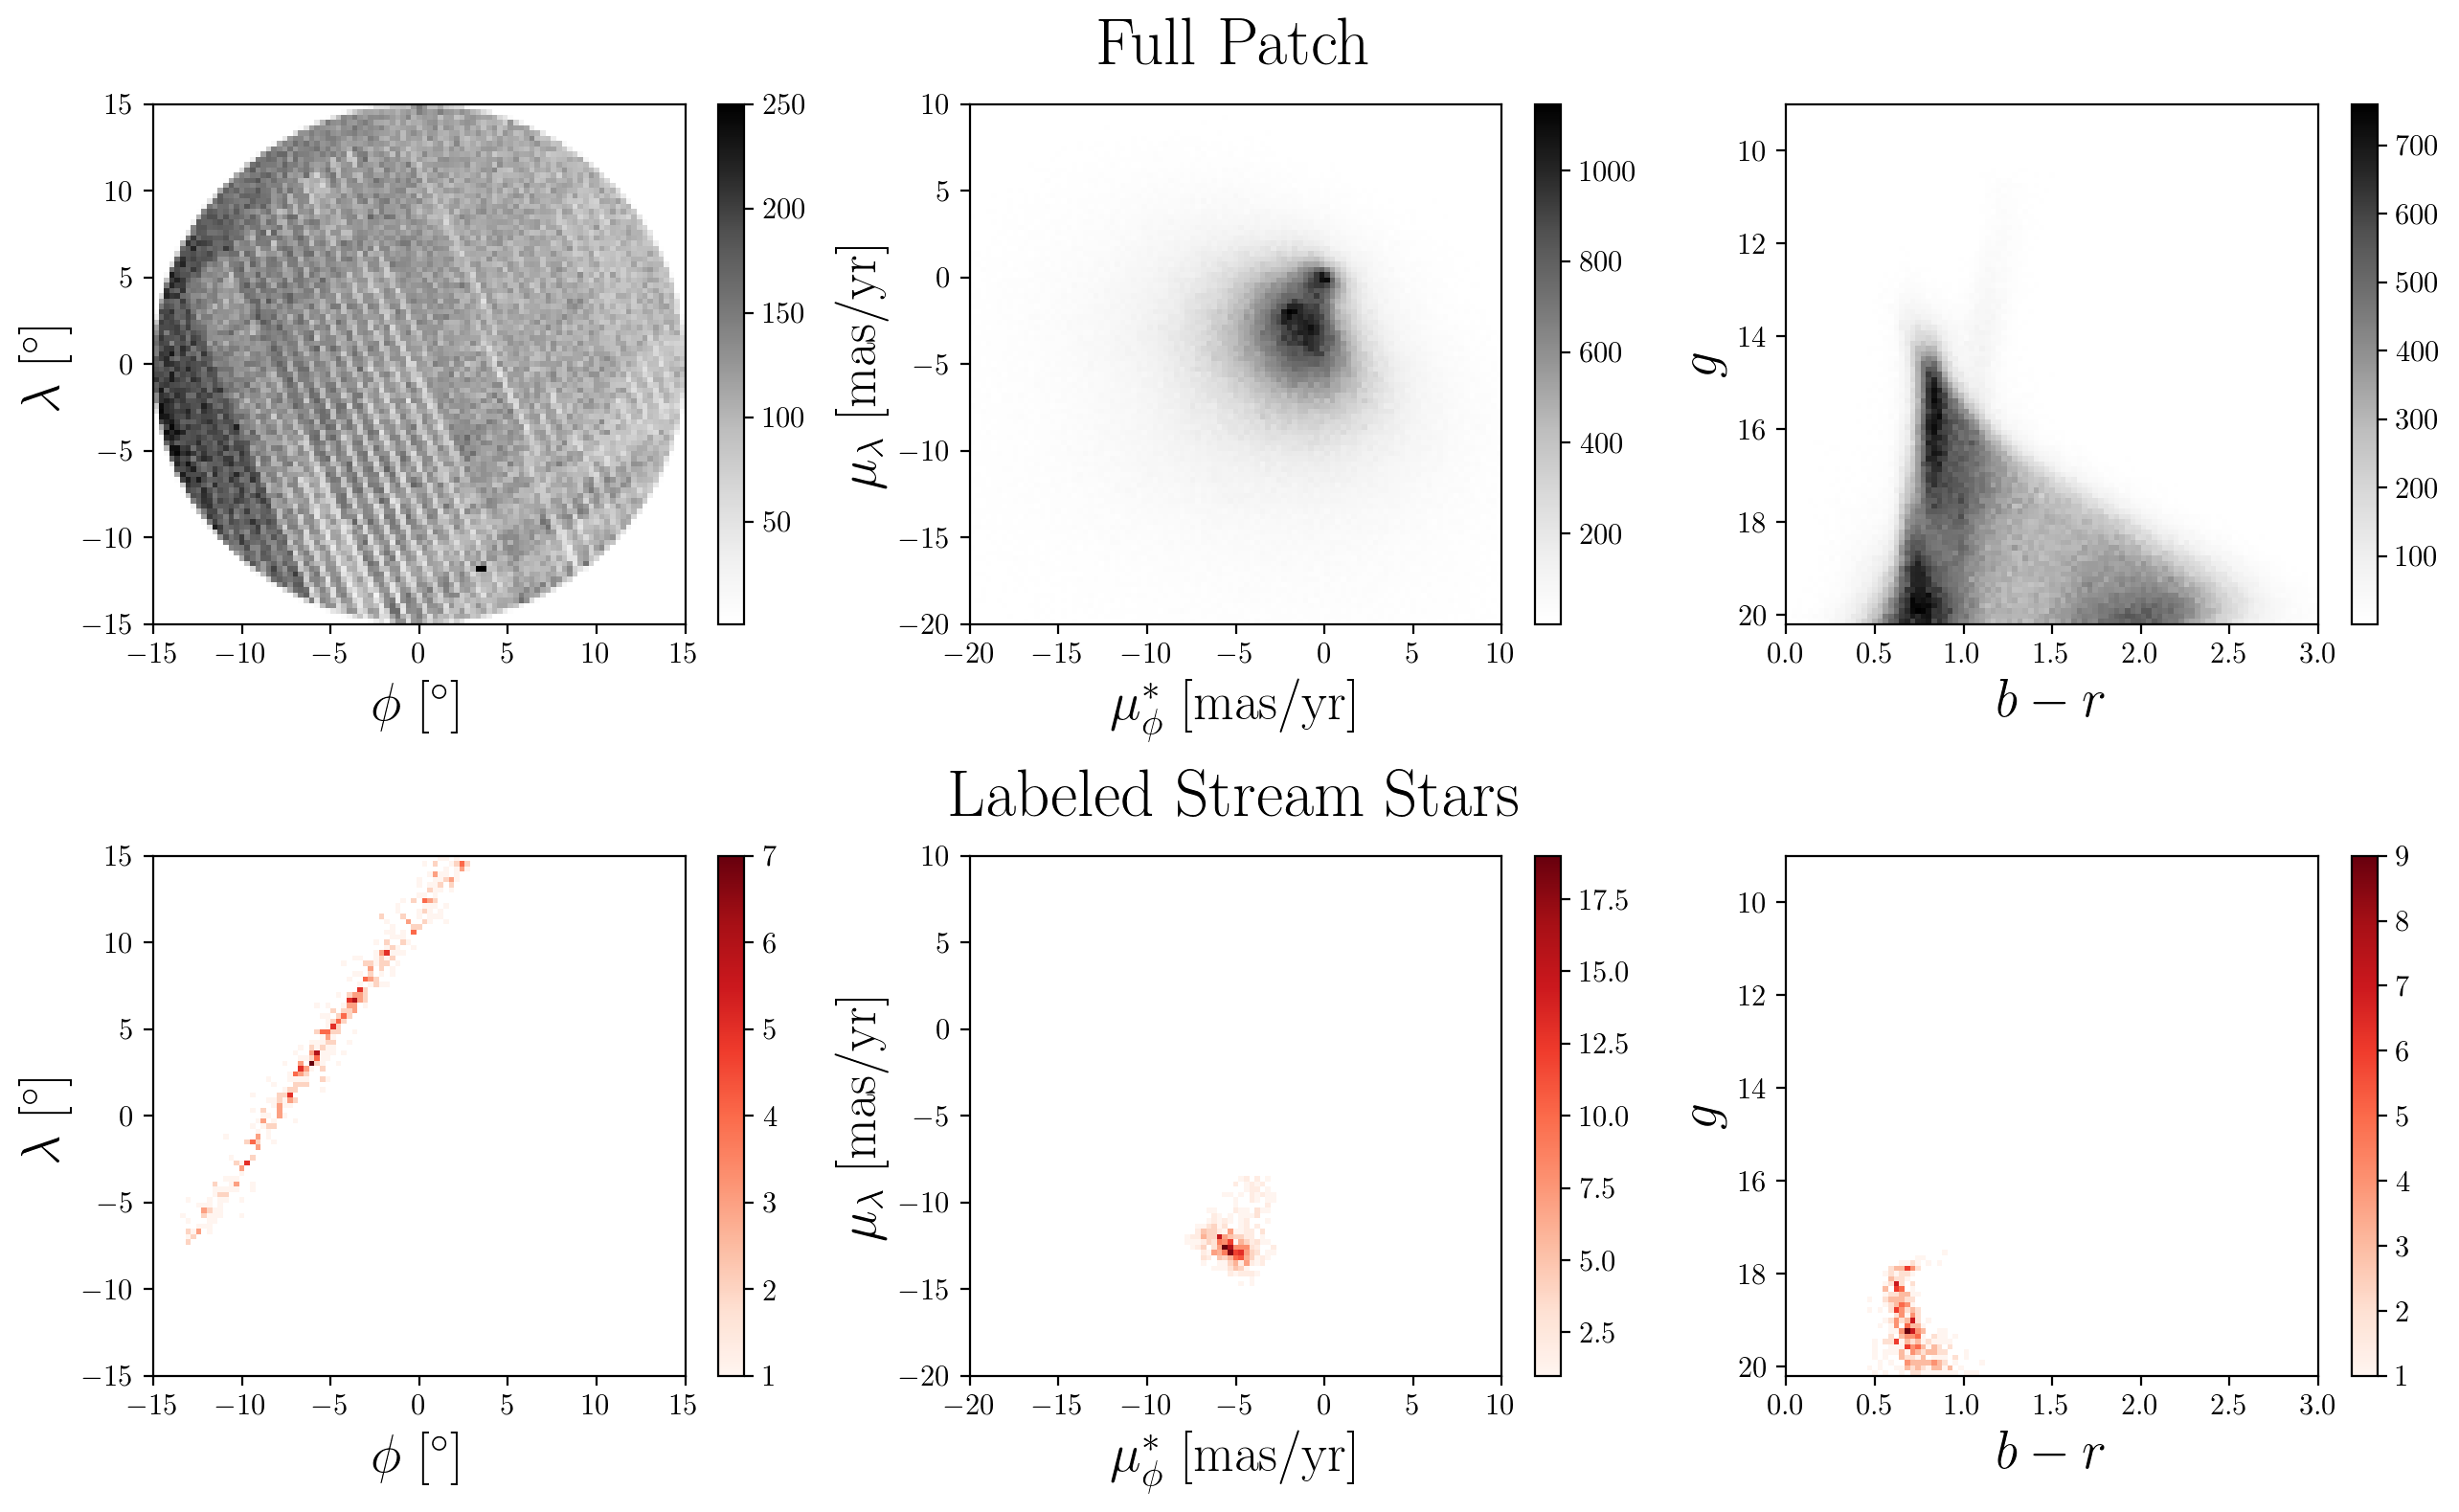

In [20]:
### Load file 
df = pd.read_hdf("../gaia_data/gd1_1_patch.h5")
make_plots(df, save_folder = save_folder)

SR factor: 1
SB factor: 3
Scanning over μ_λ
Sideband region: [-15.9,-13.6) & (-11.4,-9.1]
Signal region: [-13.6,-11.4]
Total counts: SR = 44,017, SB = 95,615
Signal region has 412 stream and 43,605 bkg events (0.94%).
Sideband region has 503 stream and 139,129 bkg events (0.36%).
f_sig = 2.6X f_sideband.


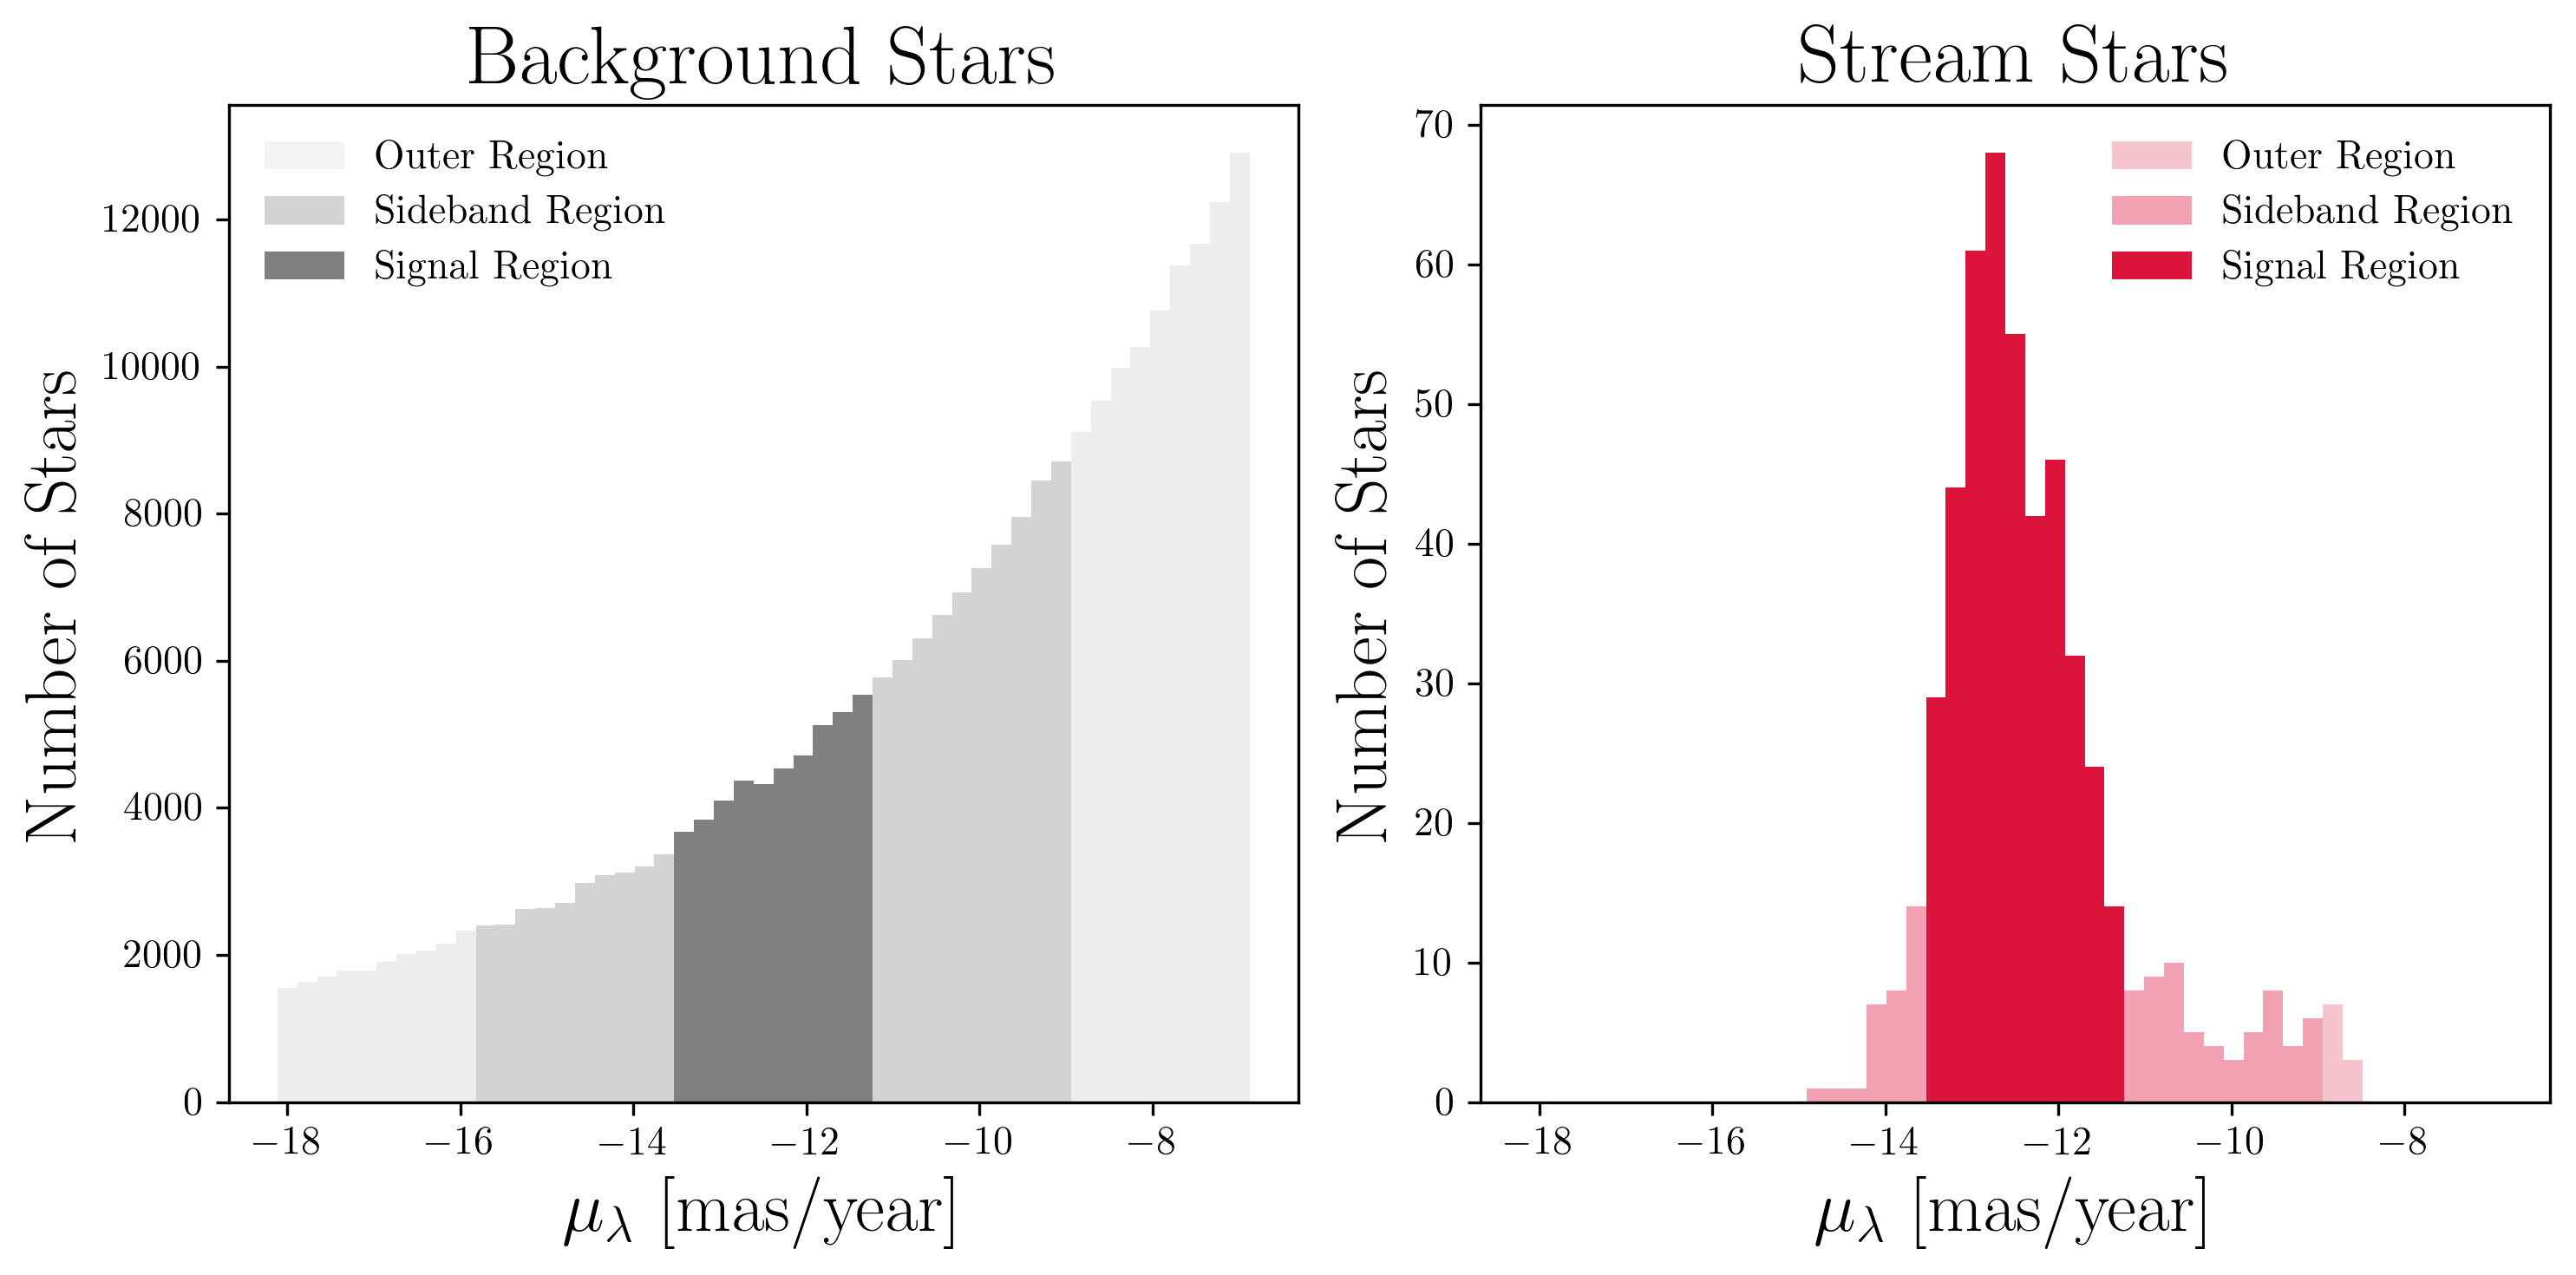

In [21]:
### Divide into signal & sideband regions
df_slice = signal_sideband(df, save_folder = save_folder, sr_factor=1, sb_factor=3)

2023-08-04 15:12:42.812011: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 15:12:43.255156: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43670 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:c1:00.0, compute capability: 8.6
2023-08-04 15:12:44.389351: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


873/873 [==============================] - 1s 818us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
873/873 [==============================] - 1s 819us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
873/873 [==============================] - 1s 729us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
873/873 [==============================] - 1s 1ms/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
873/873 [==============================] - 1s 830us/step
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


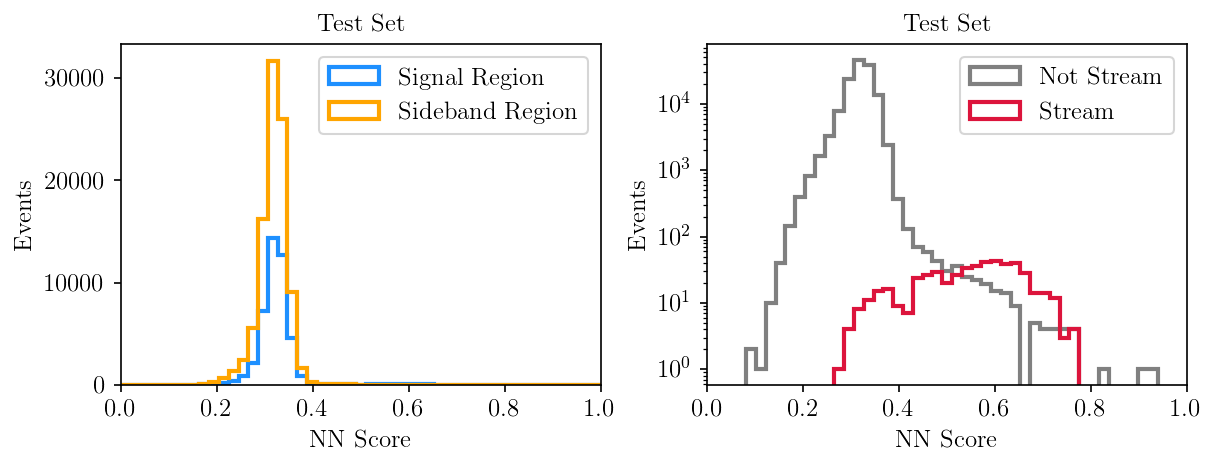

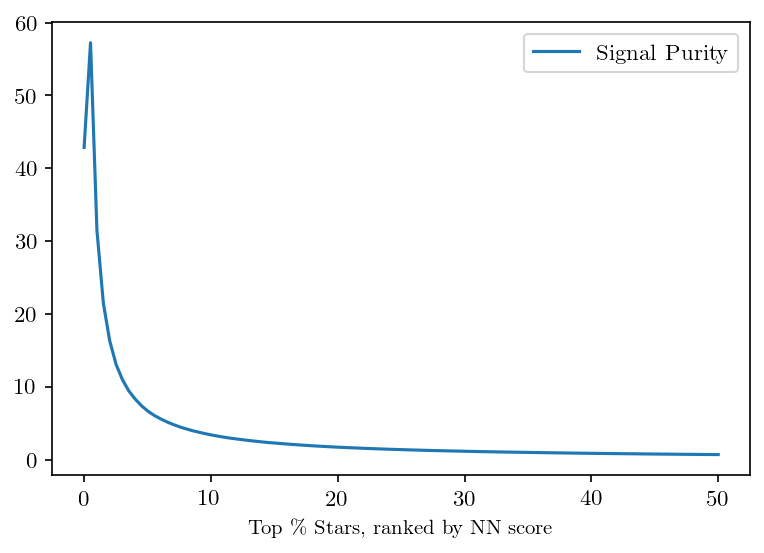

Top 50 stars: Purity = 64.0% 


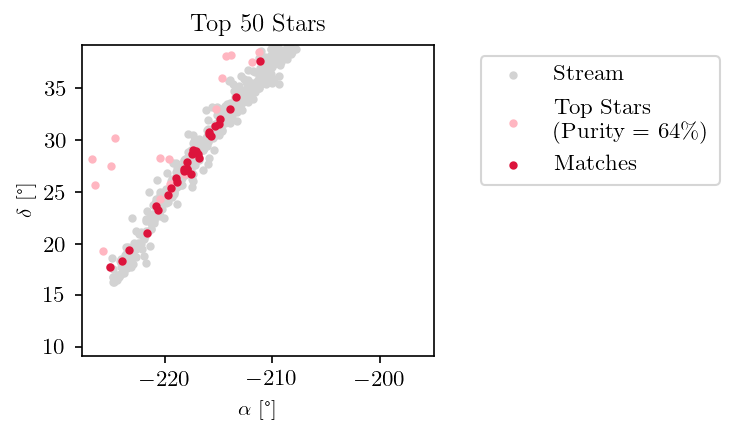

Top 100 stars: Purity = 76.0% 


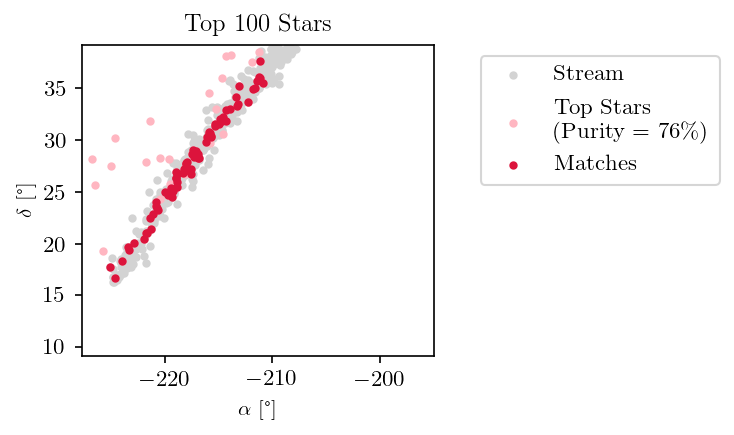

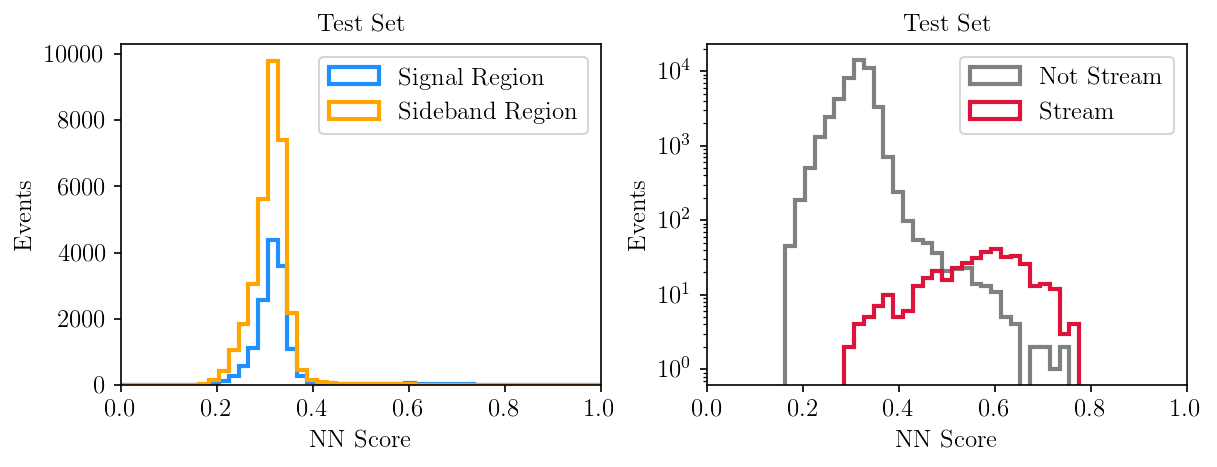

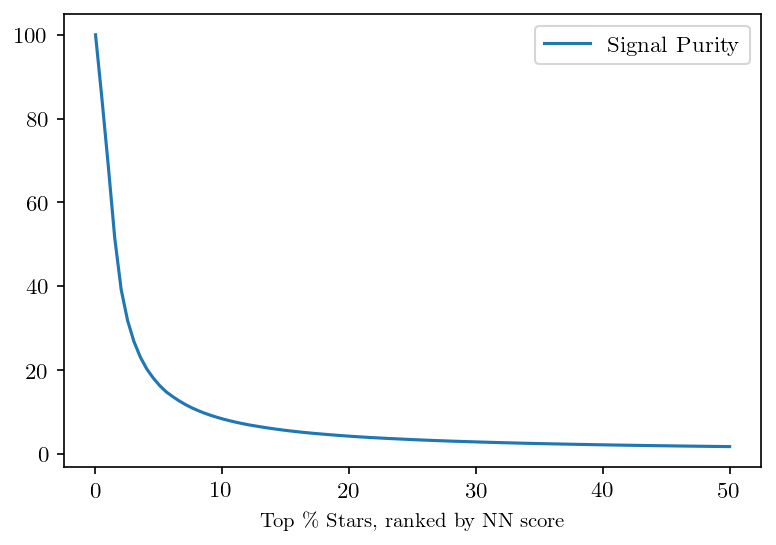

Top 50 stars: Purity = 86.0% 


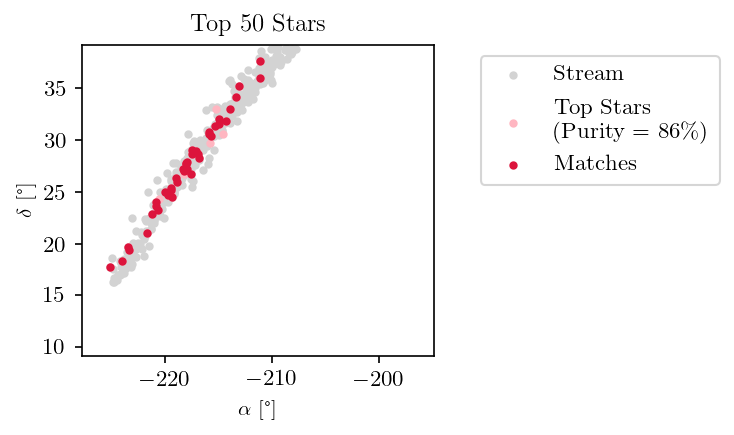

Top 100 stars: Purity = 91.0% 


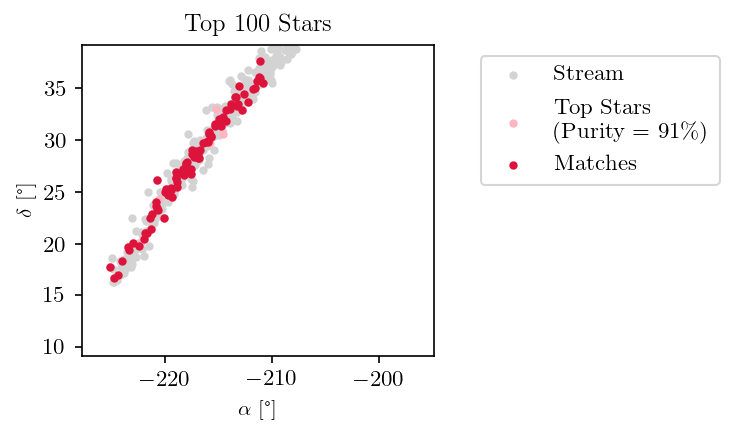

In [22]:
### Train 
tf.keras.backend.clear_session()
test = train(df_slice, verbose=False, save_folder = save_folder)